<a href="https://colab.research.google.com/github/kanjamwingirwa/FIFA-Prediction/blob/main/Farnadis_Kanja_Moudule_2_IP_WK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**:You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**Defining the Metric For Success:** An accurate prediction of a game based on who is home and who is away as well as whether the game is friendly or not

**Understanding the Context**: FIFA regulalry updates their ranking depending on the results of the games played throughout the year. This system began in 1993 and one can tell through the FIFA ranking how strong a team is. Factors that determine FIFA ranking include; whether the game is home or away, what kind of tournament it is. Depending on the score, the ranking of a country can either go up or down.

**Recording the experimental design**
The following steps wil be taken;
1. Data cleaning and preparation
2. Exploratory data analysis
3. Polynomial Regression
4. Logistic Regression
5. Conclusions

# **Data Preparation and Cleaning**

In [120]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
#Load and preview the data sets
ranks = pd.read_csv('fifa_ranking.csv')
ranks.head(5)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
results = pd.read_csv('results.csv')
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Looking at the shape of the data
ranks.shape, results.shape

((57793, 16), (40839, 9))

In [8]:
#check the info of both data sets
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [9]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [10]:
#We begin by changing the dates to date type through parse_date
ranks['rank_date']= pd.to_datetime(ranks['rank_date'], dayfirst= True)
ranks.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [11]:
#check if it has been successful 
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [12]:
#We begin by changing the dates to date type through parse_date
results['date']= pd.to_datetime(results['date'], dayfirst= True)
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [13]:
#check if it has been successful 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [14]:
#separating the year from the rest of the date
ranks['year']=pd.DatetimeIndex(ranks['rank_date']).year
ranks.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993


In [16]:
#separating the year from the rest of the date
results['year']=pd.DatetimeIndex(results['date']).year
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


We notice that the results and rankings did not begin at the same time and thus, we need to remedy that. 

In [42]:
#delete all the years from 1872 to 1992 for the results dataset to match the rankings dataset.
results_df= results.loc[results.date>='1993-08-08'] 
results_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993


In [44]:
#delete all the years after 2018 for the results dataset to match the rankings dataset.
results_df= results.loc[results.year<2019] 
results_df.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [45]:
#check for null values in both data sets
ranks.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
dtype: int64

In [46]:
#check for null values in both data sets
results_df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

In [47]:
#drop what I feel are unnecessary columns in rankings
ranks_df=ranks.drop(['country_abrv', 'total_points','previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted','last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis=1)
ranks_df.head(5)  

,rank,country_full,confederation,rank_date,year
0,1,Germany,UEFA,1993-08-08,1993
1,2,Italy,UEFA,1993-08-08,1993
2,3,Switzerland,UEFA,1993-08-08,1993
3,4,Sweden,UEFA,1993-08-08,1993
4,5,Argentina,CONMEBOL,1993-08-08,1993


In [48]:
#check the basic properties of either data set
ranks_df.describe()

,rank,year
count,57793.000000,57793.000000
mean,101.628086,2006.177357
std,58.618424,7.032549
min,1.000000,1993.000000
25%,51.000000,2000.000000
50%,101.000000,2006.000000
75%,152.000000,2012.000000
max,209.000000,2018.000000


In [49]:
#check the basic properties of either data set
results_df.describe()

,home_score,away_score,year
count,40351.000000,40351.000000,40351.000000
mean,1.746177,1.187728,1989.597705
std,1.747949,1.402555,24.114847
min,0.000000,0.000000,1872.000000
25%,1.000000,0.000000,1977.000000
50%,1.000000,1.000000,1997.000000
75%,2.000000,2.000000,2008.000000
max,31.000000,21.000000,2018.000000


In [60]:
#merging the data sets
#using home team first 
home=pd.merge(results_df, ranks_df, left_on = ['home_team', 'year'], right_on =['country_full', 'year'], how = 'inner')
home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,confederation,rank_date
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08
1,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,42,Ghana,CAF,1993-09-23
2,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,40,Ghana,CAF,1993-10-22
3,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,41,Ghana,CAF,1993-11-19
4,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,37,Ghana,CAF,1993-12-23


In [66]:
#merging the data sets
#using home team first 
final_df=pd.merge(home, ranks_df, left_on = ['away_team', 'year'], right_on =['country_full', 'year'], how = 'inner')
final_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,confederation_x,rank_date_x,rank_y,country_full_y,confederation_y,rank_date_y
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08,74,Mali,CAF,1993-08-08
1,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08,70,Mali,CAF,1993-09-23
2,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08,73,Mali,CAF,1993-10-22
3,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08,75,Mali,CAF,1993-11-19
4,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,CAF,1993-08-08,70,Mali,CAF,1993-12-23


In [68]:
final_df=final_df.drop(['city','country', 'neutral', 'country_full_x','confederation_x','country_full_y' ], axis=1)
final_df.head(5)  

,date,home_team,away_team,home_score,away_score,tournament,year,rank_x,rank_date_x,rank_y,confederation_y,rank_date_y
0,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,74,CAF,1993-08-08
1,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,70,CAF,1993-09-23
2,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,73,CAF,1993-10-22
3,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,75,CAF,1993-11-19
4,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,70,CAF,1993-12-23


In [77]:
#rename the confederations column
final_df.rename(columns={'confederation_y':'confederation', 'rank_x':'home_team_rank', 'rank_y':'away_team_rank','rank_date_x': 'home_team_date', 'rank_date_y': 'away_team_date'}, inplace = True)
final_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_date,away_team_rank,confederation,away_team_date
0,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,74,CAF,1993-08-08
25,1993-07-04,Gabon,Mali,0,2,Friendly,1993,64,1993-08-08,74,CAF,1993-08-08
50,1993-01-03,Burkina Faso,Mali,1,0,Friendly,1993,113,1993-08-08,74,CAF,1993-08-08
75,1993-12-03,Sierra Leone,Mali,2,0,Amílcar Cabral Cup,1993,86,1993-08-08,74,CAF,1993-08-08
100,1993-11-27,Senegal,Mali,0,1,Amílcar Cabral Cup,1993,58,1993-08-08,74,CAF,1993-08-08


In [78]:
#check for duplicates
final_df.duplicated(subset = ['date', 'home_team', 'home_score','away_score']).sum()

0

In [93]:
final_df.drop_duplicates(subset = ['date', 'home_team', 'home_score','away_score'], keep = 'first', inplace = True)
final_df.head(200)

,date,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_date,away_team_rank,confederation,away_team_date,games,game
0,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly
25,1993-07-04,Gabon,Mali,0,2,Friendly,1993,64,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly
50,1993-01-03,Burkina Faso,Mali,1,0,Friendly,1993,113,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly
75,1993-12-03,Sierra Leone,Mali,2,0,Amílcar Cabral Cup,1993,86,1993-08-08,74,CAF,1993-08-08,Regionals,Regionals
100,1993-11-27,Senegal,Mali,0,1,Amílcar Cabral Cup,1993,58,1993-08-08,74,CAF,1993-08-08,Regionals,Regionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,1993-05-09,Lebanon,Hong Kong,2,2,FIFA World Cup qualification,1993,108,1993-08-08,103,AFC,1993-08-08,Regionals,Regionals
4900,1993-06-11,Bahrain,Hong Kong,3,0,FIFA World Cup qualification,1993,79,1993-08-08,103,AFC,1993-08-08,Regionals,Regionals
4925,1993-06-07,India,Bahrain,0,3,FIFA World Cup qualification,1993,129,1993-08-08,79,AFC,1993-08-08,Regionals,Regionals
4950,1993-05-13,Lebanon,Bahrain,0,0,FIFA World Cup qualification,1993,108,1993-08-08,79,AFC,1993-08-08,Regionals,Regionals


In [81]:
#analyzing the final df
final_df.shape

(18384, 12)

In [82]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18384 entries, 0 to 2331193
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            18384 non-null  datetime64[ns]
 1   home_team       18384 non-null  object        
 2   away_team       18384 non-null  object        
 3   home_score      18384 non-null  int64         
 4   away_score      18384 non-null  int64         
 5   tournament      18384 non-null  object        
 6   year            18384 non-null  int64         
 7   home_team_rank  18384 non-null  int64         
 8   home_team_date  18384 non-null  datetime64[ns]
 9   away_team_rank  18384 non-null  int64         
 10  confederation   18384 non-null  object        
 11  away_team_date  18384 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 1.8+ MB


In [85]:
#looking for null values
final_df.isna().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
year              0
home_team_rank    0
home_team_date    0
away_team_rank    0
confederation     0
away_team_date    0
dtype: int64

In [87]:
#checking for the unique values in the tournament column
final_df.tournament.unique()

array(['Friendly', 'Amílcar Cabral Cup',
       'African Cup of Nations qualification',
       'FIFA World Cup qualification', 'Merdeka Tournament', "King's Cup",
       'USA Cup', 'Nehru Cup', 'Copa América', 'Copa Paz del Chaco',
       'Korea Cup', 'Baltic Cup', 'UNCAF Cup', 'Gold Cup', 'Kirin Cup',
       'CFU Caribbean Cup qualification', 'CFU Caribbean Cup',
       'United Arab Emirates Friendship Tournament',
       'African Cup of Nations', 'Simba Tournament', 'FIFA World Cup',
       'UEFA Euro qualification', 'Gulf Cup', 'CECAFA Cup',
       'Malta International Tournament',
       'Oceania Nations Cup qualification', 'Confederations Cup',
       'Dynasty Cup', 'Oceania Nations Cup', 'SAFF Cup',
       'Windward Islands Tournament', 'South Pacific Games',
       'AFC Asian Cup qualification', 'AFC Asian Cup',
       'King Hassan II Tournament', 'UEFA Euro', 'AFF Championship',
       'Lunar New Year Cup', 'COSAFA Cup', 'Dunhill Cup',
       'Tournoi de France', 'Cyprus Intern

In [97]:
#we then write some code to classify each of the games in the tournament
def tournament(game):
  if game == 'FIFA World Cup':
    return 'World Cup' 
  elif game == 'FIFA World Cup qualification':
    return 'Qualifiers'
  elif game == 'Confederations Cup':
    return 'Confederation Cup'
  elif game == 'Friendly':
    return 'Friendly'
  else:
    return 'Regionals'

final_df['game']= final_df['tournament'].apply(lambda k: tournament(k))
final_df['game'].unique()            


array(['Friendly', 'Regionals', 'Qualifiers', 'World Cup',
       'Confederation Cup'], dtype=object)

In [98]:
#we write some code to determine whether a game is a win, loss or draw
#create a [score] column such that we decide whether the match was a win, loss of draw
final_df['score'] = final_df['home_score']-final_df['away_score']
def score(final_score):
  if final_score == 0:
    return 'DRAW'
  elif final_score > 0:
    return 'WIN'
  else:
    return 'LOSS'
final_df['final_score']= final_df['score'].apply(lambda k: score(k))
final_df.head(5)     

,date,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_date,away_team_rank,confederation,away_team_date,games,game,score,final_score
0,1993-01-01,Ghana,Mali,1,1,Friendly,1993,48,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly,0,DRAW
25,1993-07-04,Gabon,Mali,0,2,Friendly,1993,64,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly,-2,LOSS
50,1993-01-03,Burkina Faso,Mali,1,0,Friendly,1993,113,1993-08-08,74,CAF,1993-08-08,Friendly,Friendly,1,WIN
75,1993-12-03,Sierra Leone,Mali,2,0,Amílcar Cabral Cup,1993,86,1993-08-08,74,CAF,1993-08-08,Regionals,Regionals,2,WIN
100,1993-11-27,Senegal,Mali,0,1,Amílcar Cabral Cup,1993,58,1993-08-08,74,CAF,1993-08-08,Regionals,Regionals,-1,LOSS


In [100]:
final_df['final_score'].unique() 

array(['DRAW', 'LOSS', 'WIN'], dtype=object)

## **Exploratory Data Analysis**

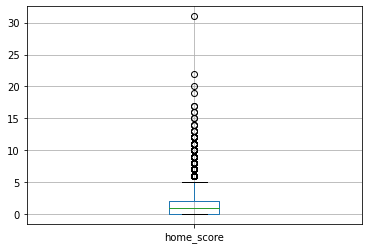

In [128]:
#check for outliers in the homescore
boxplot = final_df.boxplot(column=['home_score'])
#most home goals were btn 0 and 2. We keep the outliers 

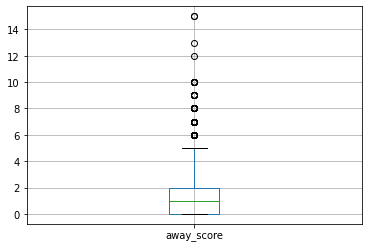

In [129]:
#check for outliers in the homescore
boxplot = final_df.boxplot(column=['away_score'])
#most home goals were btn 0 and 2. We keep the outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


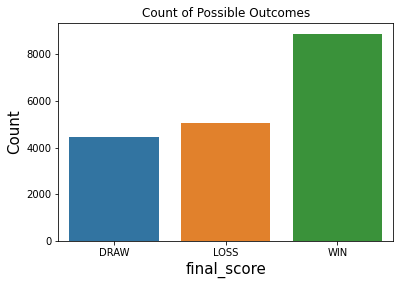

In [130]:
sns.countplot('final_score', data = final_df)
plt.xlabel('final_score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Possible Outcomes')
plt.show()
#There are generally more wins than losses and draws in the compatitions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


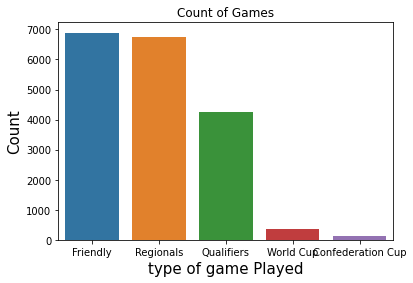

In [138]:
sb.countplot('game', data = final_df)
plt.xlabel('type of game Played', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Games')
plt.show()
#most games played were friendly and the least was confederation cup

# **Modelling**

In [143]:
#checking for multicollinearity
corr = final_df[['home_score', 'away_score', 'home_team_rank', 'away_team_rank', 'game']].corr()
corr

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.166920,-0.124995,0.306203
away_score,-0.166920,1.000000,0.211352,-0.162414
home_team_rank,-0.124995,0.211352,1.000000,0.474597
away_team_rank,0.306203,-0.162414,0.474597,1.000000


The diagonal 1 is correct since each variable is definitely correlated with itself. 
There is a positive correlation btn away score and home team rank while there is a negative one btn away score and away team rank. 

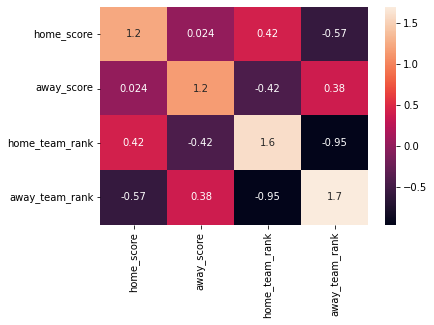

In [145]:
#compute VIF
VIF_df=pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sns.heatmap(VIF_df, annot = True)
plt.show()

very little multicollinearity is seen here

# **Polynomial Regression**

**Model One:Home Score Predicition**

In [188]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
final_df['game']=label_encoder.fit_transform(final_df['game'])
final_df['game'].unique()

array([1, 3, 2, 4, 0])

In [220]:
final_df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,home_team_date,away_team_rank,confederation,away_team_date,games,game,score,final_score
0,1993-01-01,Ghana,Mali,1,1,27,1993,48,1993-08-08,74,CAF,1993-08-08,Friendly,1,0,DRAW
25,1993-07-04,Gabon,Mali,0,2,27,1993,64,1993-08-08,74,CAF,1993-08-08,Friendly,1,-2,LOSS
50,1993-01-03,Burkina Faso,Mali,1,0,27,1993,113,1993-08-08,74,CAF,1993-08-08,Friendly,1,1,WIN


In [231]:
#import the necessary libraries
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=final_df.iloc[:,[7,9,13]].values
y=final_df['home_score'].values
print(X)
print(y)

[[ 48  74   1]
 [ 64  74   1]
 [113  74   1]
 ...
 [153 143   3]
 [ 93 153   3]
 [127 163   3]]
[1 0 1 ... 2 3 1]


In [237]:
#split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [241]:
#let us try 4df
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)


In [242]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

In [243]:
#let us make predictions using our model
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [245]:
from sklearn import metrics
print('The RMSE score for the model is: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The RMSE score for the model is:  1.4676841314218647


In [247]:
#let us create our residual
residuals= np.subtract(y_pred, y_test)
print('The residual mean for our model is: ', residuals.mean())

The residual mean for our model is:  0.007891900230925852


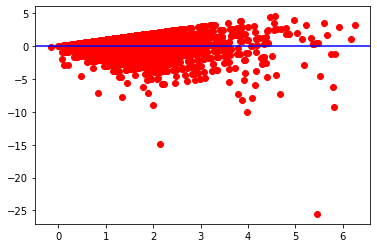

In [248]:
#heteroskedasticity 
residuals = y_pred - y_test
plt.scatter(y_pred, residuals, color = 'red')
plt.axhline(y = residuals.mean(), color = 'blue')
plt.show()
#our model is quite accurate

**Model 2: Away Goals Prediction**

In [249]:
#creating independent and dependent variable
X=final_df.iloc[:,[7,9,13]].values
y=final_df['away_score'].values
print(X)
print(y)

[[ 48  74   1]
 [ 64  74   1]
 [113  74   1]
 ...
 [153 143   3]
 [ 93 153   3]
 [127 163   3]]
[1 2 0 ... 5 0 1]


In [250]:
#split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [251]:
#let us try 4df
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [252]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

In [254]:
#let us make predictions using our model
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [255]:
from sklearn import metrics
print('The RMSE score for the model is: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The RMSE score for the model is:  1.1279971345292747


In [256]:
#let us create our residual
residuals= np.subtract(y_pred, y_test)
print('The residual mean for our model is: ', residuals.mean())

The residual mean for our model is:  0.01497469108251334


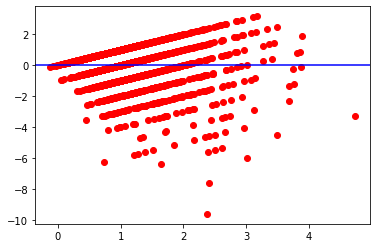

In [257]:
#heteroskedasticity
residuals = y_pred - y_test
plt.scatter(y_pred, residuals, color = 'red')
plt.axhline(y = residuals.mean(), color = 'blue')
plt.show()
#our model is fairly good

The polynomial model did a fairly good job in predicting the score for both home and away

# **Logistic Regression Model**

In [260]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
final_df['final_score']=label_encoder.fit_transform(final_df['final_score'])
final_df['final_score'].unique()

array([0, 1, 2])

In [261]:
X=final_df.iloc[:,[3,7]].values
y=final_df['final_score'].values
print(X)
print(y)

[[  1  48]
 [  0  64]
 [  1 113]
 ...
 [  2 153]
 [  3  93]
 [  1 127]]
[0 1 2 ... 1 2 0]


In [262]:
#split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [263]:
#fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [264]:
#use our model to make a prediction
y_pred = LogReg.predict(X_test)

In [265]:
#Evaluating our model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 296,  447,  152],
       [ 200,  732,   82],
       [ 308,  109, 1351]])

This matrix shows that there are 296, 732 and 1351 correct predictions but with a lot of incorrect predictions. 

**HyperParameter Tuning**

In [268]:
#creating the logistic regression
from sklearn import linear_model,datasets
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()

In [270]:
#create regularization penalty space
penalty = ['l1', 'l2']
#create regularization hyperparameter space
C=np.logspace(0,4,10)
#create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [271]:
#creating grid search using 5-fold cross validation
clf=GridSearchCV(logistic, hyperparameters, cv=5,verbose=0)

In [272]:
#fitting the grid search
best_model = clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [273]:
#viewing the parameters
print('Best Penalty: ' , best_model.best_estimator_.get_params()['penalty'])
print('Best C: ' , best_model.best_estimator_.get_params()['C']) 

Best Penalty:  l2
Best C:  2.7825594022071245


In [274]:
#predicting the target vector
best_model.predict(X)

array([0, 1, 1, ..., 2, 2, 1], dtype=int64)

# **Conclusion**

The polynomial regression provided a better prediction model than the logistic regression. There were too many inaccurate predictions with the logistic regression thus it cannot be trusted. 

Follow Up Questions
1. Did we have the right data? We did have the right data but we need more domain knowledge.

2. Do we need any other data? No. the data provided is sufficient. 

3. Did we have the right questions? Perhaps not, we gave too much attention to the ranks and scores ignoring other factors. 